In [1]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

In [21]:
## Loading datasets
def load_datasets():
    datasetA, metaA = arff.loadarff(open('R15.arff','r'))
    datasetB, metaB = arff.loadarff(open('disk-1000n.arff','r'))
    datasetC, metaC = arff.loadarff(open('spiralsquare.arff','r'))
    datasetD, metaD = arff.loadarff(open('elly-2d10c13s.arff','r'))
    datasetE, metaE = arff.loadarff(open('cure-t2-4k.arff','r'))
    datasetF, metaF = arff.loadarff(open('square5.arff','r'))
    datasetG, metaG = arff.loadarff(open('rings.arff','r'))
    datasetH, metaH = arff.loadarff(open('cluto-t8-8k.arff','r'))
    
    return ([datasetA, datasetB, datasetC, datasetD, datasetE, datasetF, datasetG, datasetH],[metaA, metaB, metaC, metaD, metaE, metaF, metaG, metaH])


In [3]:
### Find eps for DBSCAN
def dbscan_eps(dataset, nb_min, nb_max, pas, nb_samples):
    
    duration = []
    sil_score = []
    db_score = []
    chi_score = []
    dlabels = []

    X = [[x,y] for (x,y,c) in dataset]

    for e in np.arange(nb_min,nb_max,pas):
        start_time = time.time()
        dbscan = DBSCAN(eps=e, min_samples=nb_samples).fit(X)
        elapsed = time.time() - start_time
        labels = dbscan.labels_
        dlabels.append(labels)
        sil = metrics.silhouette_score(X, labels)
        db = metrics.davies_bouldin_score(X, labels)
        chi = metrics.calinski_harabaz_score(X, labels)
        sil_score.append(sil)
        db_score.append(db)
        chi_score.append(chi)
        duration.append(elapsed)

    best_eps_sil = sil_score.index(min(sil_score))
    best_eps_db = db_score.index(min(db_score))
    best_eps_chi = chi_score.index(max(chi_score))

    plt.plot(np.arange(nb_min,nb_max,pas),sil_score,label = "silhouette coefficient")
    plt.plot(np.arange(nb_min,nb_max,pas),db_score,label = "DB index")
    plt.xlabel('epsilon')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(np.arange(nb_min,nb_max,pas),chi_score,label = "Calinski and Harabasz index")
    plt.xlabel('epsilon')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(np.arange(nb_min,nb_max,pas),duration, label = "Execution time")
    plt.xlabel('epsilon')
    plt.ylabel('time')
    plt.show()
      
    return ((best_eps_sil, best_eps_db, best_eps_chi),dlabels)

In [4]:
### Find min samples for DBSCAN
def dbscan_samples(dataset, nb_min, nb_max, epsilon):
    
    duration = []
    sil_score = []
    db_score = []
    chi_score = []
    dlabels = []

    X = [[x,y] for (x,y,c) in dataset]

    for samp in range(nb_min,nb_max):
        start_time = time.time()
        dbscan = DBSCAN(eps=epsilon, min_samples=samp).fit(X)
        elapsed = time.time() - start_time
        labels = dbscan.labels_
        dlabels.append(labels)
        sil = metrics.silhouette_score(X, labels)
        db = metrics.davies_bouldin_score(X, labels)
        chi = metrics.calinski_harabaz_score(X, labels)
        sil_score.append(sil)
        db_score.append(db)
        chi_score.append(chi)
        duration.append(elapsed)

    best_samp_sil = sil_score.index(min(sil_score)) + nb_min
    best_samp_db = db_score.index(min(db_score)) + nb_min
    best_samp_chi = chi_score.index(max(chi_score)) + nb_min

    plt.plot(range(nb_min,nb_max),sil_score,label = "silhouette coefficient")
    plt.plot(range(nb_min,nb_max),db_score,label = "DB index")
    plt.xlabel('min samples')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(nb_min,nb_max),chi_score,label = "Calinski and Harabasz index")
    plt.xlabel('min samples')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(nb_min,nb_max),duration, label = "Execution time")
    plt.xlabel('min samples')
    plt.ylabel('time')
    plt.show()
      
    return ((best_samp_sil, best_samp_db, best_samp_chi),dlabels)

In [22]:
data, metadata = load_datasets()

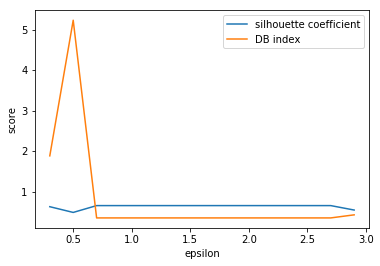

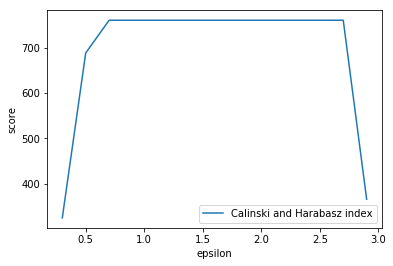

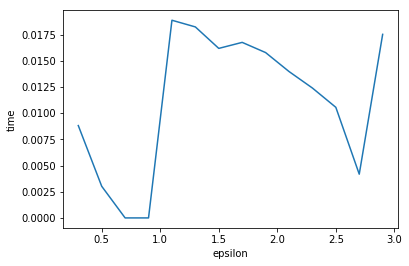

best epsilon with silhouette coefficient:  0.5
best epsilon with DB index:  0.7
best epsilon with Calinski and Harabasz index:  0.7
k with silhouette coefficient: 12
k with DB index: 8
k with Calinski and Harabasz index: 8


In [6]:
min_eps = 0.3
max_eps = 3.0
step_eps = 0.2

samples = 5

((e_sil,e_db,e_chi),labels) = dbscan_eps(data[0],min_eps,max_eps,step_eps,samples)

epsilon_range = np.arange(min_eps,max_eps,step_eps)
print("best epsilon with silhouette coefficient: ", epsilon_range[e_sil])
print("best epsilon with DB index: ", epsilon_range[e_db])
print("best epsilon with Calinski and Harabasz index: ", epsilon_range[e_chi])

best_labels_sil = labels[e_sil]
best_labels_db = labels[e_db]
best_labels_chi = labels[e_chi]

print("k with silhouette coefficient:",np.unique(best_labels_sil).shape[0])
print("k with DB index:",np.unique(best_labels_db).shape[0])
print("k with Calinski and Harabasz index:",np.unique(best_labels_chi).shape[0])

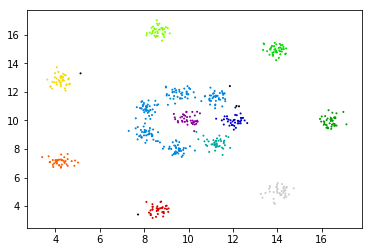

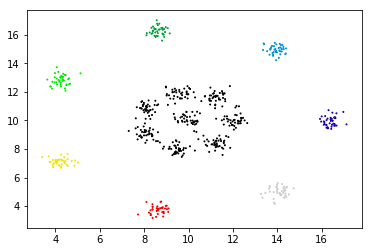

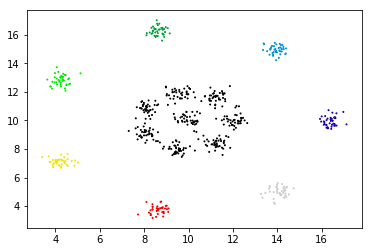

In [7]:
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_sil, s = 1, cmap = 'nipy_spectral')
plt.show()
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_db, s = 1, cmap = 'nipy_spectral')
plt.show()
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_chi, s = 1, cmap = 'nipy_spectral')
plt.show()

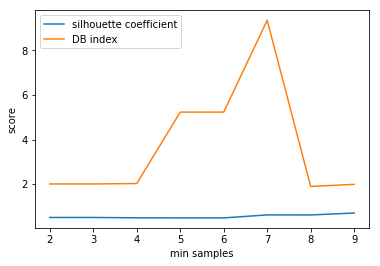

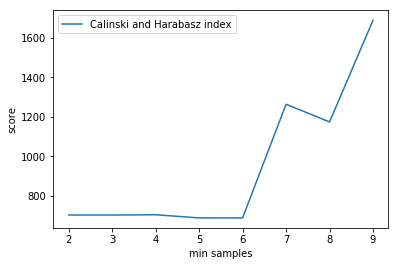

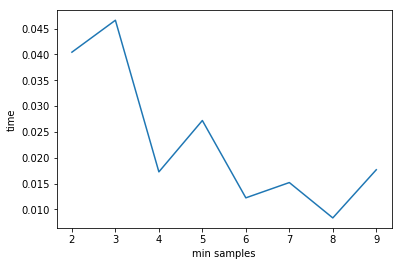

best min samples with silhouette coefficient:  5
best min samples with DB index:  8
best min samples with Calinski and Harabasz index:  9
k with silhouette coefficient: 12
k with DB index: 13
k with Calinski and Harabasz index: 15


In [8]:
best_epsilon = 0.5
min_nb_samples = 2
max_nb_samples = 10

((s_sil,s_db,s_chi),labels) = dbscan_samples(data[0],min_nb_samples,max_nb_samples,best_epsilon)

print("best min samples with silhouette coefficient: ", s_sil)
print("best min samples with DB index: ", s_db)
print("best min samples with Calinski and Harabasz index: ", s_chi)

best_labels_sil = labels[s_sil-min_nb_samples]
best_labels_db = labels[s_db-min_nb_samples]
best_labels_chi = labels[s_chi-min_nb_samples]

print("k with silhouette coefficient:",np.unique(best_labels_sil).shape[0])
print("k with DB index:",np.unique(best_labels_db).shape[0])
print("k with Calinski and Harabasz index:",np.unique(best_labels_chi).shape[0])

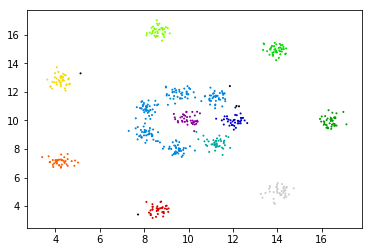

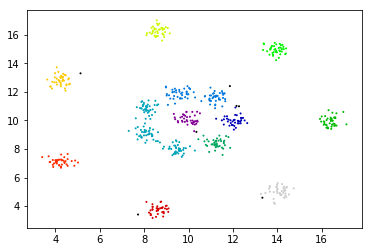

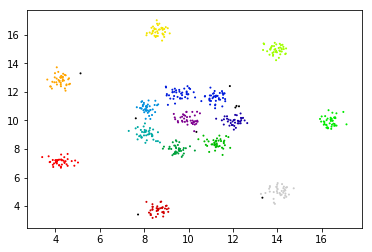

In [9]:
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_sil, s = 1, cmap = 'nipy_spectral')
plt.show()
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_db, s = 1, cmap = 'nipy_spectral')
plt.show()
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_chi, s = 1, cmap = 'nipy_spectral')
plt.show()

In [26]:
def dbscan_params(dataset, nb_min, nb_max, min_eps,max_eps,step_eps):
    
    s_duration_sil = []
    s_duration_db = []
    s_duration_chi = []
    
    s_sil_score = []
    s_db_score = []
    s_chi_score = []
    
    s_labels_sil = []
    s_labels_db = []
    s_labels_chi = []

    samp_eps_sil = []
    samp_eps_db = []
    samp_eps_chi = []
    
    X = [[x,y] for (x,y,c) in dataset]

    all_samp = []
    
    for samp in range(nb_min,nb_max):
        duration = []
        sil_score = []
        db_score = []
        chi_score = []
        dlabels = []
        
        all_eps = []

        for e in np.arange(min_eps,max_eps,step_eps):
            start_time = time.time()
            dbscan = DBSCAN(eps=e, min_samples=samp).fit(X)
            elapsed = time.time() - start_time
            labels = dbscan.labels_
            if np.unique(labels).shape[0] < 2:
                continue
            dlabels.append(labels)
            sil = metrics.silhouette_score(X, labels)
            db = metrics.davies_bouldin_score(X, labels)
            chi = metrics.calinski_harabaz_score(X, labels)
            sil_score.append(sil)
            db_score.append(db)
            chi_score.append(chi)
            duration.append(elapsed)
            all_eps.append(e)

        if len(sil_score) < 1:
            continue
        
        best_eps_sil = sil_score.index(min(sil_score))
        best_eps_db = db_score.index(min(db_score))
        best_eps_chi = chi_score.index(max(chi_score))
        
        samp_eps_sil.append(all_eps[best_eps_sil])
        samp_eps_db.append(all_eps[best_eps_db])
        samp_eps_chi.append(all_eps[best_eps_chi])
        
        s_sil_score.append(sil_score[best_eps_sil])
        s_db_score.append(db_score[best_eps_db])
        s_chi_score.append(chi_score[best_eps_chi])
        
        s_duration_sil.append(duration[best_eps_sil])
        s_duration_db.append(duration[best_eps_db])
        s_duration_chi.append(duration[best_eps_chi])

        s_labels_sil.append(dlabels[best_eps_sil])
        s_labels_db.append(dlabels[best_eps_db])
        s_labels_chi.append(dlabels[best_eps_chi])
        
        all_samp.append(samp)
        
    best_samp_sil_index = s_sil_score.index(min(s_sil_score))
    best_samp_db_index = s_db_score.index(min(s_db_score))
    best_samp_chi_index = s_chi_score.index(max(s_chi_score))
    
    best_samp_sil = all_samp[best_samp_sil_index]
    best_samp_db = all_samp[best_samp_db_index]
    best_samp_chi = all_samp[best_samp_chi_index]
    
    best_eps_sil = samp_eps_sil[best_samp_sil_index]
    best_eps_db = samp_eps_db[best_samp_db_index]
    best_eps_chi = samp_eps_chi[best_samp_chi_index]

    print("best with silhouette coefficient: eps=", samp_eps_sil[best_samp_sil_index],"min_samples=", best_samp_sil)
    print("best with DB index: eps=",samp_eps_db[best_samp_db_index],"min_samples=", best_samp_db)
    print("best with Calinski and Harabasz index: eps=",samp_eps_chi[best_samp_chi_index],"min_samples=", best_samp_chi)

    plt.plot(all_samp,s_sil_score,label = "silhouette coefficient")
    plt.plot(all_samp,s_db_score,label = "DB index")
    plt.xlabel('min samples')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(all_samp,s_chi_score,label = "Calinski and Harabasz index")
    plt.xlabel('min samples')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(all_samp,s_duration_sil,label = "Execution time - silhouette coefficient")
    plt.plot(all_samp,s_duration_db,label = "Execution time - DB index")
    plt.plot(all_samp,s_duration_chi,label = "Execution time - Calinski and Harabasz index")
    plt.xlabel('min samples')
    plt.ylabel('time')
    plt.legend()
    plt.show()
      
    return ((best_samp_sil,best_eps_sil,s_labels_sil[best_samp_sil_index]),
            (best_samp_db,best_eps_db,s_labels_db[best_samp_db_index]),
            (best_samp_chi,best_eps_chi,s_labels_chi[best_samp_chi_index]))

best with silhouette coefficient: eps= 0.1 min_samples= 4
best with DB index: eps= 0.7000000000000001 min_samples= 2
best with Calinski and Harabasz index: eps= 0.4 min_samples= 16


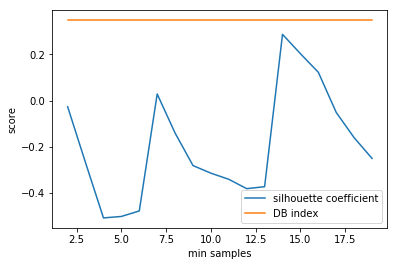

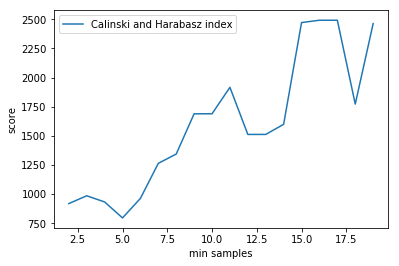

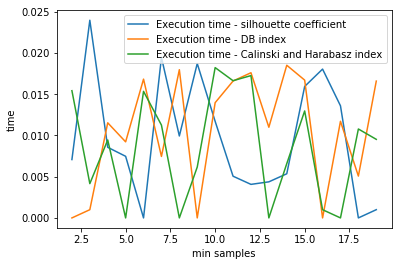

k with silhouette coefficient: 26
k with DB index: 8
k with Calinski and Harabasz index: 14


In [12]:
min_eps = 0.1
max_eps = 3.0
step_eps = 0.1

min_nb_samples = 2
max_nb_samples = 20

((minpts_sil,eps_sil,best_labels_sil),
 (minpts_db,eps_db,best_labels_db),
 (minpts_chi,eps_chi,best_labels_chi)) = dbscan_params(data[0],min_nb_samples,max_nb_samples,min_eps,max_eps,step_eps)

print("k with silhouette coefficient:",np.unique(best_labels_sil).shape[0])
print("k with DB index:",np.unique(best_labels_db).shape[0])
print("k with Calinski and Harabasz index:",np.unique(best_labels_chi).shape[0])

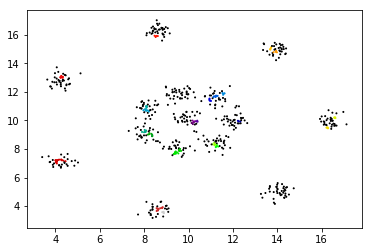

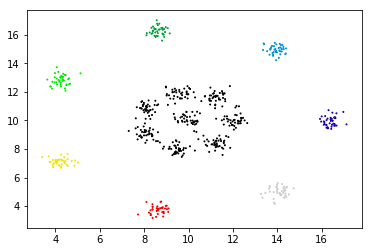

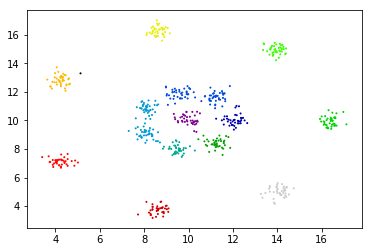

In [13]:
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_sil, s = 1, cmap = 'nipy_spectral')
plt.show()
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_db, s = 1, cmap = 'nipy_spectral')
plt.show()
plt.scatter(data[0]['x'],data[0]['y'], c = best_labels_chi, s = 1, cmap = 'nipy_spectral')
plt.show()

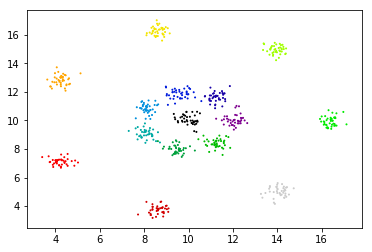

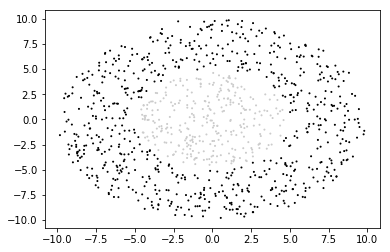

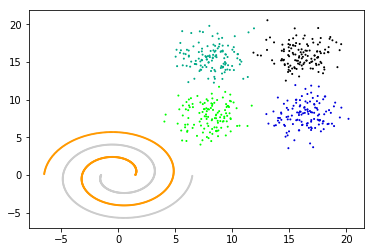

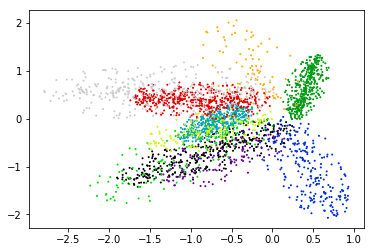

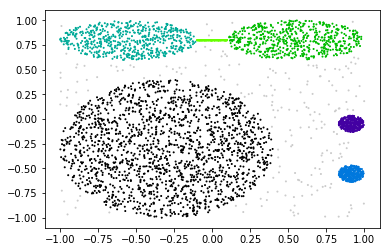

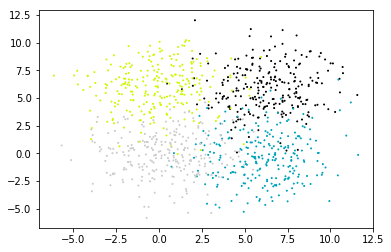

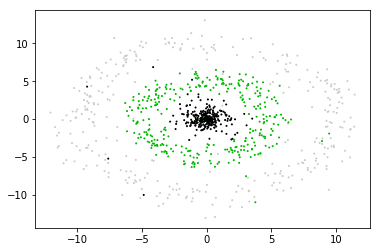

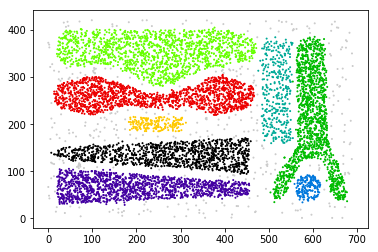

In [23]:
def plot_datasets(datasets, metas):
    for i in range(len(datasets)):
        dataset = datasets[i]
        meta = metas[i]
        try:
            plt.scatter(dataset[meta.names()[0]],
                    dataset[meta.names()[1]],
                    c = dataset[meta.names()[2]],
                    s = 1, cmap = 'nipy_spectral')
        except ValueError:
            plt.scatter(dataset[meta.names()[0]],
                        dataset[meta.names()[1]],
                        c = [int(s) if s.isdigit() else 8 for str in dataset[meta.names()[2]] for s in str.split()],
                        s = 1, cmap = 'nipy_spectral')
        plt.show()
plot_datasets(data,metadata)

Dataset: R15
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15')

best with silhouette coefficient: eps= 0.1 min_samples= 4
best with DB index: eps= 0.7000000000000001 min_samples= 29
best with Calinski and Harabasz index: eps= 0.7000000000000001 min_samples= 29


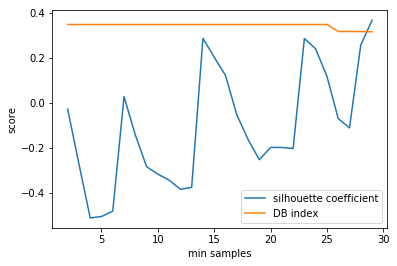

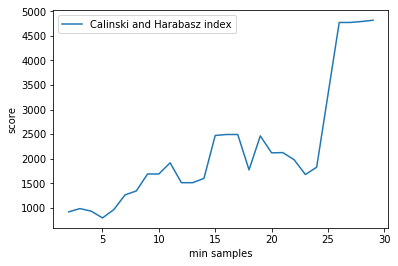

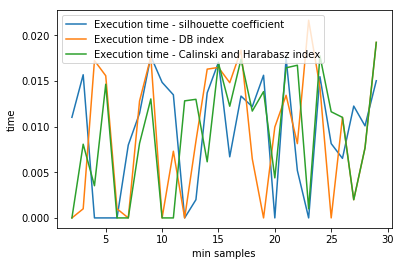

k with silhouette coefficient: 26
k with DB index: 15
k with Calinski and Harabasz index: 15


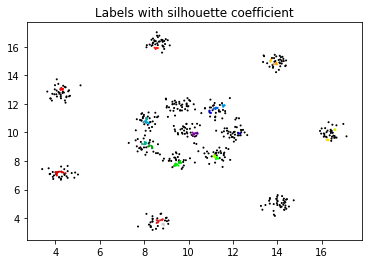

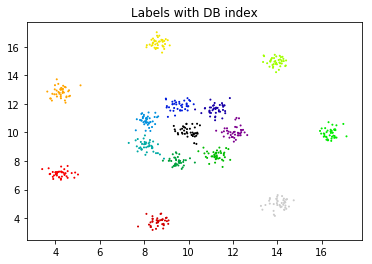

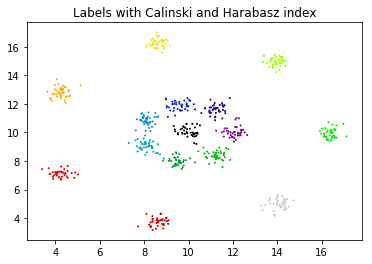

Dataset: disk-1000n
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('0', '1')



In [ ]:
# parameters to try for each dataset (min_eps,max_eps,step_eps,min_nb_samples,max_nb_samples)
params = [(0.1,3.0,0.1,2,30),
          (1.0,20.0,0.5,2,100),
          (0.1,1.0,0.1,2,100),
          (0.1,1.8,0.05,2,100),
          (1.0,10.0,0.5,2,80),
          (1,20,0.5,2,100),
          (0.5,20.0,0.5,2,100),
          (1,200,10,2,100)]

for i in range(len(data)):
    dataset = data[i]
    meta = metadata[i]
    (min_eps,max_eps,step_eps,min_nb_samples,max_nb_samples) = params[i]
    print(meta)
    
    ((minpts_sil,eps_sil,best_labels_sil),
     (minpts_db,eps_db,best_labels_db),
     (minpts_chi,eps_chi,best_labels_chi)) = dbscan_params(data[i],min_nb_samples,max_nb_samples,min_eps,max_eps,step_eps)

    print("k with silhouette coefficient:",np.unique(best_labels_sil).shape[0])
    print("k with DB index:",np.unique(best_labels_db).shape[0])
    print("k with Calinski and Harabasz index:",np.unique(best_labels_chi).shape[0])

    plt.scatter(dataset[meta.names()[0]],
                        dataset[meta.names()[1]],
                        c = best_labels_sil,
                        s = 1, cmap = 'nipy_spectral')
    plt.title("Labels with silhouette coefficient")
    plt.show()

    plt.scatter(dataset[meta.names()[0]],
                        dataset[meta.names()[1]],
                        c = best_labels_db,
                        s = 1, cmap = 'nipy_spectral')
    plt.title("Labels with DB index")
    plt.show()

    plt.scatter(dataset[meta.names()[0]],
                        dataset[meta.names()[1]],
                        c = best_labels_chi,
                        s = 1, cmap = 'nipy_spectral')
    plt.title("Labels with Calinski and Harabasz index")
    plt.show()